# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x_values=np.array([17,51,27,21,36,48,19,26,54,30])
y_values=np.array([10,1,5,9,4,2,9,6,0,3])

In [3]:
# Your code here. 

student_data = pd.DataFrame({'X': x_values, 'Y': y_values})

Draw a dispersion diagram (scatter plot) for the data.

In [4]:
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


In [5]:
# Your code here.

#student_data.set_index

student_data.index = student_data.index + 1
student_data

,X,Y
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0
10,30,3


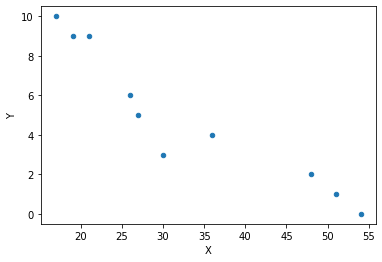

In [6]:
# scatter plot

student_data.plot.scatter(x='X', y='Y')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [7]:
# Your response here. 

import statsmodels.api as sm

#negatively correlated

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [8]:
# Your response here.

#covariance

cov=np.cov(x_values, y_values, ddof=1)

cov

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

In [9]:
cov[0,1]


-45.56666666666666

In [10]:
#correlation

correlation=np.corrcoef(x_values, y_values)

correlation

array([[ 1.        , -0.93916269],
       [-0.93916269,  1.        ]])

In [11]:
# an increase by 1 years, decreases the tardies by 0.939
# negative covariance: variables move in opposite directions
#strong negative correlation (close to 1)
#correlation=cov/(stdx*stdy)
#Covariance indicates the direction of the linear relationship between variables. 
#Correlation measures both the strength and direction of the linear relationship between two variables

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [12]:
# Your response here.

reg=student_data.copy()
reg=sm.add_constant(reg)
reg

,const,X,Y
1,1.0,17,10
2,1.0,51,1
3,1.0,27,5
4,1.0,21,9
5,1.0,36,4
6,1.0,48,2
7,1.0,19,9
8,1.0,26,6
9,1.0,54,0
10,1.0,30,3


In [13]:
model = sm.OLS(reg["Y"], 
       reg[["const", "X"]])
results = model.fit()
results

In [14]:
results.summary()

C:\Users\Bruna Miguel\Documents\anaconda\envs\matrix\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           5.57e-05
Time:                        16:15:36   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
X             -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

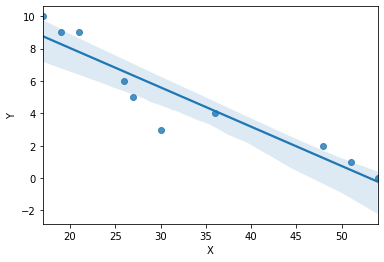

In [15]:
# Your code here.

sns.regplot(x='X', y='Y', data=reg);

(1.0, 50.0)

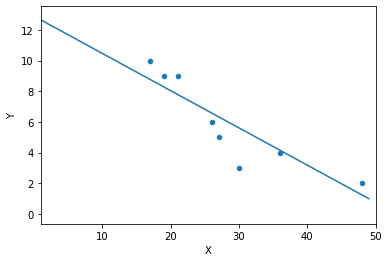

In [16]:
#results

model = sm.OLS(reg["Y"], 
       reg[["const", "X"]])
results = model.fit()
p=results.params

# generate x-values for your regression line
x = np.arange(0, 50)

# scatter-plot on the dataframe
ax = reg.plot(x='X', y='Y', kind='scatter')

# plot regression line on the same axes, set x-axis limits
ax.plot(x, p.const + p.X * x)
ax.set_xlim([1, 50])


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [17]:
# Your response here. 
#we dont reject hypotheses, t value 11

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [18]:
# Import any libraries you may need & the data

vehicles=pd.read_csv('vehicles.csv')

vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [19]:
vehicles.columns

#year=np.array(vehicles['Year'])

x=([vehicles['Year'],vehicles['Cylinders'], vehicles['Fuel Barrels/Year'], vehicles['Combined MPG'], vehicles['Fuel Cost/Year']])
#y_values=np.array([10,1,5,9,4,2,9,6,0,3])

y=np.array(vehicles['CO2 Emission Grams/Mile'])

In [20]:
# Your response here. 

cyear=np.corrcoef(x, y)
cyear

array([[ 1.        ,  0.08246886, -0.22108408,  0.20475053, -0.0919129 ,
        -0.2222996 ],
       [ 0.08246886,  1.        ,  0.73951745, -0.69864786,  0.77815274,
         0.75239255],
       [-0.22108408,  0.73951745,  1.        , -0.90974268,  0.91620841,
         0.98618866],
       [ 0.20475053, -0.69864786, -0.90974268,  1.        , -0.87518476,
        -0.92622904],
       [-0.0919129 ,  0.77815274,  0.91620841, -0.87518476,  1.        ,
         0.93086515],
       [-0.2222996 ,  0.75239255,  0.98618866, -0.92622904,  0.93086515,
         1.        ]])

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [21]:
# Your response here. 

reg=sm.add_constant(vehicles)

model = sm.OLS(reg["CO2 Emission Grams/Mile"], 
       reg[["const", "Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]])
results = model.fit()
results

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [22]:
# Your response here. 

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                             16:15:39   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [23]:
# Your code here. 

x_v=np.array([1,3,4,6,8,9,11,14])
y_v=np.array([1,2,4,4,5,7,8,13])

party=pd.DataFrame({'X': x_v, 'Y': y_v})
party

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

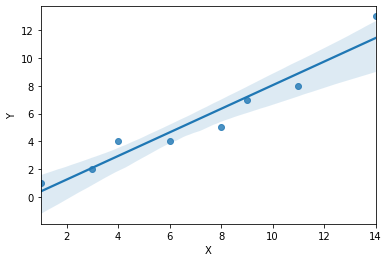

In [24]:
# Your code here.

sns.regplot(x='X', y='Y', data=party)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [25]:
# Your response here. 

party=sm.add_constant(party)

partymodel = sm.OLS(party["Y"], 
       party[["const", "X"]])
resultsparty = partymodel.fit()
resultsparty

In [26]:
resultsparty.summary()

C:\Users\Bruna Miguel\Documents\anaconda\envs\matrix\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           0.000102
Time:                        16:15:40   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.584      -2.297       1.418
X              0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [27]:
party2=party.describe().transpose()
party2

,count,mean,std,min,25%,50%,75%,max
const,8.0,1.0,0.000000,1.0,1.00,1.0,1.00,1.0
X,8.0,7.0,4.342481,1.0,3.75,7.0,9.50,14.0
Y,8.0,5.5,3.817254,1.0,3.50,4.5,7.25,13.0


In [28]:
party2['IQR'] = party2['75%'] - party2['25%']
print(party2['IQR'])

outlier25=party2['25%']-(1.5*party2['IQR'])

outlier75=party2['75%']+(1.5*party2['IQR'])

print(outlier25)
print(outlier75)

const    0.00
X        5.75
Y        3.75
Name: IQR, dtype: float64
const    1.000
X       -4.875
Y       -2.125
dtype: float64
const     1.000
X        18.125
Y        12.875
dtype: float64


In [29]:
party

,const,X,Y
0,1.0,1,1
1,1.0,3,2
2,1.0,4,4
3,1.0,6,4
4,1.0,8,5
5,1.0,9,7
6,1.0,11,8
7,1.0,14,13


In [30]:
partycopy=party.copy()


In [31]:
#partycopy=partycopy.drop[partycopy['']==]
partycopy=partycopy.drop(index=7)
partycopy

,const,X,Y
0,1.0,1,1
1,1.0,3,2
2,1.0,4,4
3,1.0,6,4
4,1.0,8,5
5,1.0,9,7
6,1.0,11,8


In [33]:

partycopy=sm.add_constant(partycopy)

partycopymodel = sm.OLS(partycopy["Y"], 
       partycopy[["const", "X"]])
resultspartycopy = partycopymodel.fit()
resultspartycopy

In [34]:
resultspartycopy.summary()

C:\Users\Bruna Miguel\Documents\anaconda\envs\matrix\lib\site-packages\statsmodels\stats\stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           0.000264
Time:                        16:17:25   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.556      -0.996       1.642
X              0.6842      0.075      9.127      0.000       0.492       0.877
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.689
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.379
Skew:                           0.284   Prob(JB):                        0.827
Kurtosis:                       2.012   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# increade of R square for instance